In [4]:
from sklearn import datasets
digits= datasets.load_digits()

<Figure size 640x480 with 0 Axes>

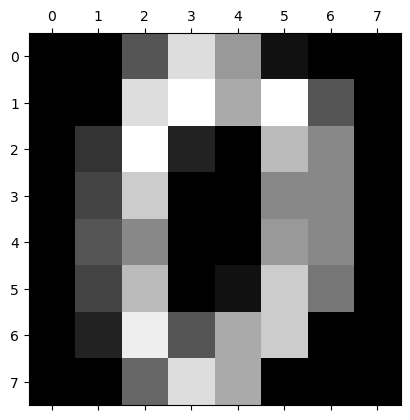

In [5]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()



In [6]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

In [7]:
digits.data[:,1].mean()

0.3038397328881469

Covarianz Matrix

In [8]:
import numpy as np
np.matmul(np.transpose(digits.data), digits.data)

digits.data.T @ digits.data

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 1.64400e+03, 7.15400e+03, ..., 3.40600e+03,
        1.30600e+03, 6.60000e+01],
       [0.00000e+00, 7.15400e+03, 8.92850e+04, ..., 6.11890e+04,
        2.18770e+04, 4.72000e+03],
       ...,
       [0.00000e+00, 3.40600e+03, 6.11890e+04, ..., 1.44749e+05,
        5.32400e+04, 9.59500e+03],
       [0.00000e+00, 1.30600e+03, 2.18770e+04, ..., 5.32400e+04,
        3.77360e+04, 9.83300e+03],
       [0.00000e+00, 6.60000e+01, 4.72000e+03, ..., 9.59500e+03,
        9.83300e+03, 6.45300e+03]])

In [9]:
np.cov(
    digits.data,
    rowvar=False
).shape

(64, 64)

Singulärwertzerlegung

In [10]:
data_prep = digits.data
feature_means = data_prep.mean(axis=1)
data_prep = data_prep - feature_means.reshape(-1,1)

data_prep.mean(axis=1)

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
U, Sigma, Vt = np.linalg.svd(
    data_prep,
    full_matrices=True
)

In [12]:
Sigma.shape

(64,)

In [13]:
smat = np.zeros((1797,64))
smat[:64, :64] = np.diag(Sigma)

In [14]:
np.allclose(U @ smat @ Vt, data_prep)

True

Projektion

Mit scikit learn

Explained variance

Rekonstruktion

Kernel PCA

In [15]:
import matplotlib.pyplot as plt

from sklearn import datasets, manifold

sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)

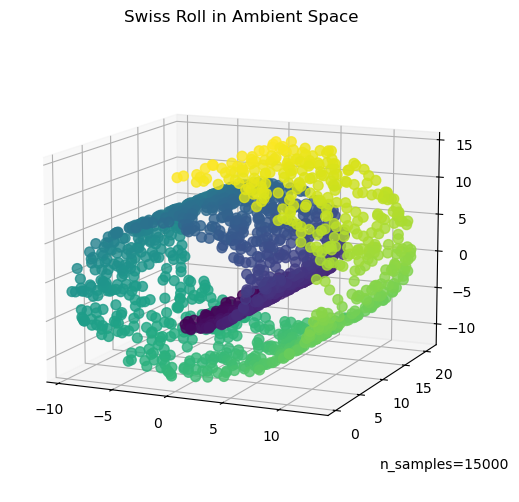

In [16]:
fig = plt.figure(figsize=(8, 6))
plt.set_cmap('viridis')
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=15000", transform=ax.transAxes)

In [17]:
isomap = manifold.Isomap(
    n_components=2,
    n_neighbors=5
)

NameError: name 'sr_points_2d' is not defined

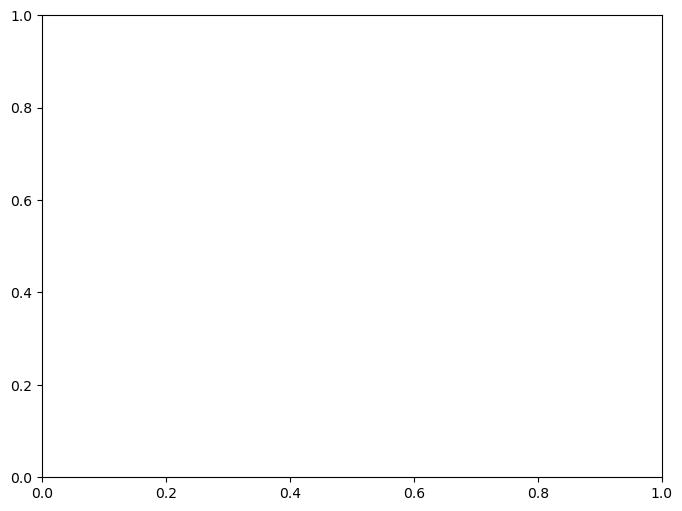

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.add_axes(ax)
ax.scatter(
    sr_points_2d[:, 0], sr_points_2d[:, 1], c=sr_color, s=50, alpha=0.4
)
ax.set_title("Swiss Roll in 2d")

Random Projection

Isomap

In [21]:
from sklearn.manifold import Isomap

T-SNE

In [22]:
from sklearn.manifold import TSNE

In [48]:
tsne = TSNE(
    n_components=2,
    perplexity=30
)

In [49]:

tsne_transformed = tsne.fit_transform(digits.data[:500])

<Axes: >

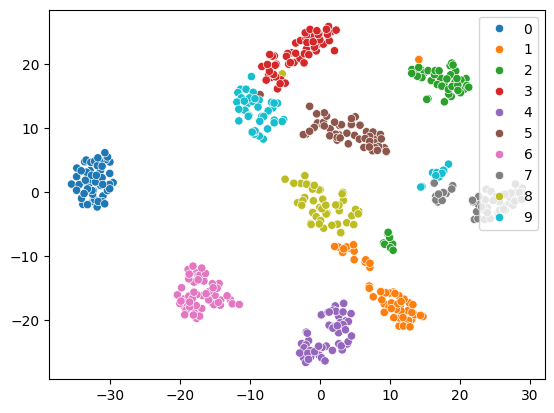

In [50]:
import seaborn as sns

sns.scatterplot(
    x = tsne_transformed[:,0],
    y = tsne_transformed[:, 1],
    hue = digits.target[:500],
    palette=sns.color_palette()
)